In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mplcl

#### Following function to plot outputs of FARGO3d in grid

This helps us to see how dust density distribution disks evolves as a function of time.

In [31]:
def grid_plot(field_name, fluid_id, output_dir, instances, grid_dimensions, planets=False):
    """
    Generates plots (2D polar) of protolanetary disks dust density distribution
    generated by FARGO3d.

    Parameters
    ----------
    field_name      : `string`, Name of the density field, ('"gas", "dust")
    fluid_id        : `string`, Fluid id (0, 1, 2, ...)
    output_dir      : `string`, Path where 
    instances       : `list`, list of output instances (integers)  which will needs to be 
                        ploted. Number of elements in the list need to be consistant with
                        grid_dimentions
    grid_dimensions : number of `rows' and `columns` in the grid (rows need to be 
                      greater then 1), in this order
    planets         : `boolean`, plots position of planets (planet 0 and 1)
    
    """

    rows = grid_dimensions[0]
    cols = grid_dimensions[1]

    max_instance,ny,nx = np.loadtxt(fname= output_dir+'/dims.dat', dtype=int, usecols=(5,6,7), \
                                    unpack=True)
    ny_nx = (ny, nx)
    domain_x = np.loadtxt(fname= output_dir + '/domain_x.dat') # azimuthual zones
    domain_y = np.loadtxt(fname= output_dir + '/domain_y.dat') # radial zones

    # Remove ghost cells from radial zones
    domain_y = domain_y[3:-3]

    # Get central values of the cells
    x =   0.5*(domain_x[:-1] + domain_x[1:]) #X-Center
    y =   0.5*(domain_y[:-1] + domain_y[1:]) #Y-Center


    theta, r = np.meshgrid(x, y)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12,8),\
                           constrained_layout=True)
    index = 0
    
    for i in range(rows):
        
        print('row = ',i)
        
        for j in range(cols):

            filename = output_dir + "/" + field_name + fluid_id + "dens" + \
                        str(instances[index]) + ".dat"
            data = np.log10(np.fromfile(file = filename).reshape(ny_nx))


            norm = mplcl.Normalize(vmin = np.min(data), vmax = np.max(data), clip = False)

            xlabel, ylabel = "x", "y"
            title = 'Output_instance ' + str(instances[index])
            
            ax[i,j].contourf(x, y, data, 100, norm=norm, alpha=1, cmap='YlOrBr')
            
            if planets==True:
                planet_r, planet_theta = np.loadtxt(fname= output_dir +'/planet'+ \
                                                        str(0) + '.dat', \
                                                        usecols=(1,2), unpack=True)
                
                # Get planet position at given output instance
                planet_x = planet_r[instances[index]]*np.cos(planet_theta[instances[index]])
                planet_y = planet_r[instances[index]]*np.sin(planet_theta[instances[index]])

                ax[i,j].scatter(planet_x, planet_y, marker='X')

                planet_r, planet_theta = np.loadtxt(fname= output_dir +'/planet'+ \
                                                        str(1) + '.dat', \
                                                        usecols=(1,2), unpack=True)

                # Get planet position at given output instance
                planet_x = planet_r[instances[index]]*np.cos(planet_theta[instances[index]])
                planet_y = planet_r[instances[index]]*np.sin(planet_theta[instances[index]])

                ax[i,j].scatter(planet_x, planet_y, marker='X',c = 'k')

            ax[i,j].axis('equal')
            ax[i,j].axis('square')
            ax[i,j].set_title(title, fontsize = 12)
            ax[i,j].set_xlabel(xlabel,fontsize=12)
            ax[i,j].set_ylabel(ylabel,fontsize=12)

            index = index + 1
            data = []  # clear data

    fig.show()
     
    return

row =  0
fargo_twof_tp_low_stokes/dust1dens0.dat
fargo_twof_tp_low_stokes/dust1dens7.dat
fargo_twof_tp_low_stokes/dust1dens25.dat
fargo_twof_tp_low_stokes/dust1dens40.dat
row =  1
fargo_twof_tp_low_stokes/dust1dens52.dat
fargo_twof_tp_low_stokes/dust1dens65.dat
fargo_twof_tp_low_stokes/dust1dens80.dat
fargo_twof_tp_low_stokes/dust1dens100.dat


C:\Users\HP\AppData\Local\Temp\ipykernel_6108\2493301179.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


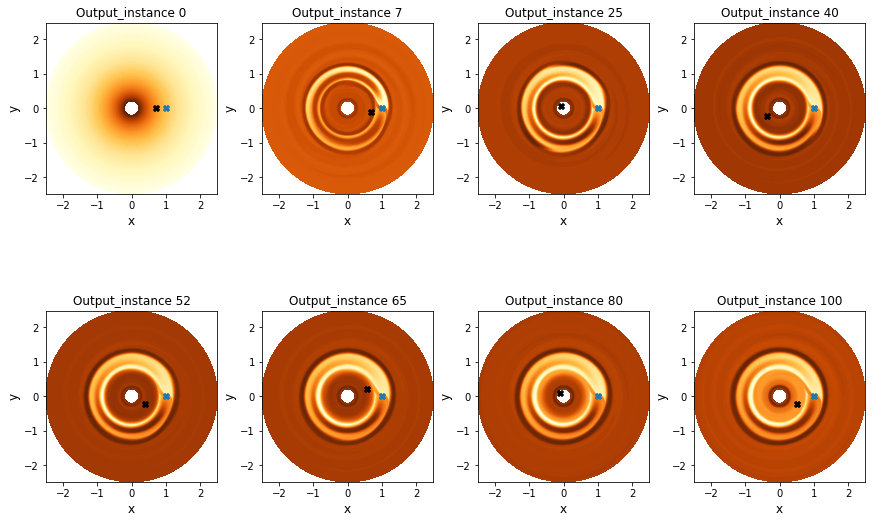

In [34]:
grid_plot(field_name = "dust",fluid_id = '1', 
          output_dir='fargo_twof_tp_low_stokes',
          instances = [0,7,25,40,52,65,80,100], grid_dimensions = [2,4], 
          planets=True, num_planets=2)